In [4]:
# Import libraries
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from random import randint
import numpy as np


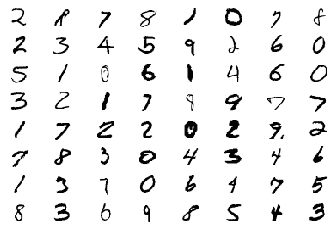

In [5]:
# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Show some random digits
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [ ]:
# Define cost functions

# Condition metric
def H(X, y, theta):
    y = y.reshape(y.shape[0], 1) # change to 2d array
    return (1 - y * (X@theta))

# SVM loss function
def svm_loss_re(X, y, theta, lamda):
    h = H(X, y, theta)
    penalty = lamda*(theta.T @ theta)
    loss = np.mean([max(0, i) for i in h])
    return np.asscalar(penalty) + np.asscalar(loss) 

# Gradient of SVM loss function
def svm_grad_re(X, y, theta, lamda):
    h = H(X, y, theta)
    # Fill in
    return grad


In [6]:
#Split dataset to num_worker workers
def split_workers(X_data, y_data, num_worker):
    # Split into 10 subdatasets for 10 workers
    data_X_list=[]
    data_y_list=[]
    num_data = len(y_data)
    num_per_data = num_data // num_worker
    for i_th in range(num_worker):
        j = num_per_data * (i_th + 1)
        i = i_th*num_per_data
        x_data_worker = X_data[i:j]
        y_data_worker = y_data[i:j]
        data_X_list.append(x_data_worker)
        data_y_list.append(y_data_worker)
        
    return data_X_list, data_y_list

# Function to train master-worker
def train(X_data, y, num_worker, num_iter, var, pLevel, lamda, alpha, lr_fade=1):
    
    # lamda: penalty
    # alpha: learning rate
    # var: noise variance
    # pLevel: noise adding probability
    # num_iter: number of iterations
    
    # Split into 10 subdatasets for 10 workers
    data_X_list, data_y_list = split_workers(X_data, y, num_worker)
    
    # train
    weight = np.random.rand(X_data.shape[1], 1)
    total_loss_list=[]
    for i_iter in range(num_iter):
        gradient_list=[]
        # Fill in
        for j_worker in range(num_worker):
            # call data_j from worker j
            # get grad from worker j
            # add noise
        # Fill in
        grad_ave = 1./num_worker*sum(gradient_list)
        alpha *= lr_fade
        weight -= alpha * grad_ave
        total_loss_list.append(svm_loss_re(X_data, y, weight, lamda))
    
    return total_loss_list


In [ ]:
# Tune noise and consider ? iterations
def tuningNoise(var, pLevel):
    return train(X_data, y, num_worker, num_iter, var, pLevel, lamda, alpha, lr_fade)

In [ ]:
# pLevel = ?; num_iter = ?
Loss_var = []
varList = #Fill in
for i in varList:
    # Fill in
    Loss_var.append(tuningNoise(var=i, pLevel=))

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

x_axis = np.arange(0, 200)
for i in range(len(Loss_var)):
    plt.semilogy(x_axis, Loss_var[i], label='R=%.2f, P=' % (varList[i]))
    
plt.xlabel('Num_of_iter')
plt.ylabel('Total loss')
plt.legend(loc='upper right', prop={'size': })
plt.savefig('Figure.png')
plt.show()